问题描述  
运⾏课上给出的notebook的代码：  
https://www.tinymind.com/ai100/notebooks/74  
给出代码的运⾏log截图并提供⼼得体会⽂档描述对整个模型构建及训练过程的理解。 

解题提示  
作业格式要求：  
1. 提交jupyter notebook生成的可执行文件（.ipynb文件）或者pycharm生成的包含源码的.py文
件，所有题目完成在同一个文件内即可。  
2. 将输出结果截图，和心得体会整理成一份markdown格式的文档，或输出为pdf格式，并提交。    

批改标准  
代码不作为评判标准，如果运⾏正确，则认为代码没有错误。  
没有明显报错的正常的log输出 60分。  
对模型结构的理解10分。  
对模型训练过程（梯度如何计算，参数如何更新）的理解10分。  
对计算图的理解10分。  
解释这⾥的模型为什么效果⽐较差10分。  

### 1. 运行课程提供代码(https://www.tinymind.com/ai100/notebooks/74)。

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
from matplotlib import pyplot as plt
%matplotlib inline

tf.logging.set_verbosity(tf.logging.INFO)

mnist = input_data.read_data_sets("./")

print(mnist.train.images.shape)
print(mnist.train.labels.shape)

print(mnist.validation.images.shape)
print(mnist.validation.labels.shape)

print(mnist.test.images.shape)
print(mnist.test.labels.shape)

C:\Users\ilove\Anaconda3\envs\tfl1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\ilove\Anaconda3\envs\tfl1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\ilove\Anaconda3\envs\tfl1.14\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\ilove\Anaconda3\envs\tfl1.14\lib\site-packages\tensorflow\

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting ./train-labels-idx1-ubyte.gz
Extracting ./t10k-images-idx3-ubyte.gz
Extracting ./t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
(55000, 784)
(55000,)
(5000, 784)
(5000,)
(10000, 784)
(10000,)


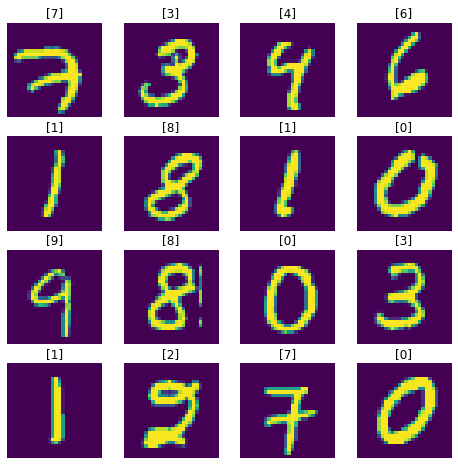

In [2]:
plt.figure(figsize=(8,8))

for idx in range(16):
    plt.subplot(4,4, idx+1)
    plt.axis('off')
    plt.title('[{}]'.format(mnist.train.labels[idx]))
    plt.imshow(mnist.train.images[idx].reshape((28,28)))

In [3]:
x = tf.placeholder("float", [None, 784])
y = tf.placeholder("int64", [None])
learning_rate = tf.placeholder("float")

def initialize(shape, stddev=0.1):
  return tf.truncated_normal(shape, stddev=0.1)

L1_units_count = 100

W_1 = tf.Variable(initialize([784, L1_units_count]))
b_1 = tf.Variable(initialize([L1_units_count]))
logits_1 = tf.matmul(x, W_1) + b_1
output_1 = tf.nn.relu(logits_1)

L2_units_count = 10 
W_2 = tf.Variable(initialize([L1_units_count, L2_units_count]))
b_2 = tf.Variable(initialize([L2_units_count]))
logits_2 = tf.matmul(output_1, W_2) + b_2  

logits = logits_2

In [4]:
cross_entropy_loss = tf.reduce_mean(
    tf.nn.sparse_softmax_cross_entropy_with_logits(logits=logits, labels=y))

optimizer = tf.train.GradientDescentOptimizer(
    learning_rate=learning_rate).minimize(cross_entropy_loss)

In [5]:
pred = tf.nn.softmax(logits)
correct_pred = tf.equal(tf.argmax(pred, 1), y)
accuracy = tf.reduce_mean(tf.cast(correct_pred, tf.float32))

In [6]:
batch_size = 32
trainig_step = 1000

saver = tf.train.Saver()

In [7]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())

    #定义验证集与测试集
    validate_data = {
        x: mnist.validation.images,
        y: mnist.validation.labels,
    }
    test_data = {x: mnist.test.images, y: mnist.test.labels}

    for i in range(trainig_step):
        xs, ys = mnist.train.next_batch(batch_size)
        _, loss = sess.run(
            [optimizer, cross_entropy_loss],
            feed_dict={
                x: xs,
                y: ys,
                learning_rate: 0.3
            })

        #每100次训练打印一次损失值与验证准确率
        if i > 0 and i % 100 == 0:
            validate_accuracy = sess.run(accuracy, feed_dict=validate_data)
            print(
                "after %d training steps, the loss is %g, the validation accuracy is %g"
                % (i, loss, validate_accuracy))
            saver.save(sess, './model.ckpt', global_step=i)

    print("the training is finish!")
    #最终的测试准确率
    acc = sess.run(accuracy, feed_dict=test_data)
    print("the test accuarcy is:", acc)

after 100 training steps, the loss is 0.350038, the validation accuracy is 0.867
after 200 training steps, the loss is 0.48012, the validation accuracy is 0.8996
after 300 training steps, the loss is 0.216543, the validation accuracy is 0.9236
after 400 training steps, the loss is 0.164641, the validation accuracy is 0.9268
after 500 training steps, the loss is 0.355863, the validation accuracy is 0.9408
after 600 training steps, the loss is 0.0300782, the validation accuracy is 0.927
Instructions for updating:
Use standard file APIs to delete files with this prefix.
after 700 training steps, the loss is 0.378117, the validation accuracy is 0.9494
after 800 training steps, the loss is 0.231794, the validation accuracy is 0.9492
after 900 training steps, the loss is 0.0263152, the validation accuracy is 0.9414
the training is finish!
the test accuarcy is: 0.9498


*验证准确率：0.9414*  
*测试准确率：0.9498*

Instructions for updating:
Use standard file APIs to check for files with this prefix.
INFO:tensorflow:Restoring parameters from ./model.ckpt-900
0.9375


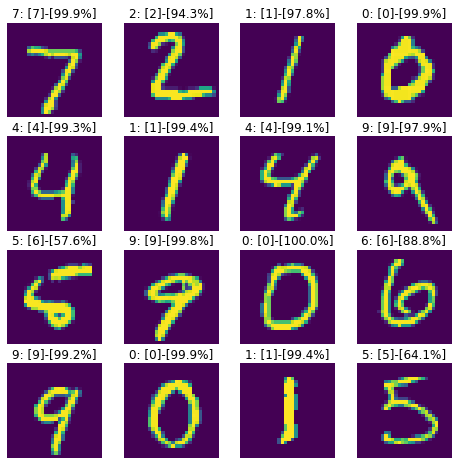

In [8]:
with tf.Session() as sess:
    ckpt = tf.train.get_checkpoint_state('./')
    if ckpt and ckpt.model_checkpoint_path:
        saver.restore(sess, ckpt.model_checkpoint_path)
        final_pred, acc = sess.run(
            [pred, accuracy],
            feed_dict={
                x: mnist.test.images[:16],
                y: mnist.test.labels[:16]
            })
        orders = np.argsort(final_pred)
        plt.figure(figsize=(8, 8))
        print(acc)
        for idx in range(16):
            order = orders[idx, :][-1]
            prob = final_pred[idx, :][order]
            plt.subplot(4, 4, idx + 1)
            plt.axis('off')
            plt.title('{}: [{}]-[{:.1f}%]'.format(mnist.test.labels[idx],
                                                  order, prob * 100))
            plt.imshow(mnist.test.images[idx].reshape((28, 28)))

    else:
        pass

*测试准确率：0.9375*

### 2. 对模型结构的理解。

1.这是一个两层的全连接神经网络，它含有输入层、一个隐层和输出层，而感知机和单层神经网络的区别就在于激活函数由阶跃函数换成非线性函数。  
2.输入层为 784 个 node 的张量，为 28x28 分辨率并经过二值化后的图片的所有像素点组成的一个向量。  
3.第一层为隐藏层，有 100 个 node，其值为输入层的 784 个 node 乘以 784x100 个权重加上偏置项后的和，经过 relu 激活函数取得的结果。  
4.第二层为输出层，输出 10个 node，其值为隐藏层的输出值乘以 100x10 个权重，加上偏置项取得（此时的输出未经过激活，后面将使用 softmax 函数进行激活）。  
5.在编写程序时，对于需要持续更新的变量，在定义的时候使用 tf.Variable(),比如权重参数和偏置项; 而对于输入 x 和标签 y，在定义的时候使用占位符 tf.placeholder()。  

### 3. 对模型训练过程（梯度如何计算，参数如何更新）的理解。

1.模型一次训练过程包括前向传播和反向传播。    
2.对于神经网络采用的损失函数为交叉熵损失，参数更新的方法为梯度下降法。参数调整的算法为反向传播算法，核心是通过比较输出值 y 和真值 t，对参与计算的 w 进行调整。  
3.前向传播过程中通过权重与输入数值相乘累加，并通过激活函数得到输出值作为下一层的输入值，逐层计算得到最终的输出值。  
4.梯度的计算是通过对每个权重进行求偏导数，然后在负梯度方向对权重参数进行更新，在偏导的求解过程中，最核心的思想是通过链式法则。  
5.反向传播过程的核心，是通过比较输出 y 和真值 t，对参与计算的 w 进行调整。其计算方法是从网络的输出层开始，向输入层方向逐层计算梯度并更新权重，与前馈运算正好相反。首先计算输出节点的总误差，并将这些误差用反向传播算法传播回网络，以计算梯度。接下来，使用类似梯度下降之类的算法来调整网络中的所有权重，目的是减少输出层的误差。当计算一个节点的误差项时，需要先计算每个与其相连的下一层节点的误差项。这就要求误差项的计算顺序必须是从输出层开始，然后反向依次计算每个隐藏层的误差项，直到与输入层相连的那个隐藏层。当所有节点的误差项计算完毕后，就更新了所有的权重。  
6.参数更新采用的是负梯度方向，用之前的参数减学习率乘以损失函数对该权重参数的偏导。  

### 4. 对计算图的理解。

1.计算图主要由四个部分构成：1、张量（Tensor） 2、操作（Operation） 3、变量（Variable） 4、会话（Session）  
2.变量（Variable）是在优化运算过程中可以进行更新的节点，被定义成变量，比如权重参数和偏置，而像输入特征 x 和标签 y 则用占位符 placeholder() 定义。在本例中，权重 w 和偏置项 b 都会随着迭代的进行而不断变化着，这样的值就可以拿来作为变量。在实际的训练过程中，一般会把需要训练的值设置为变量。在使用变量的时候会给变量设置一个初始值，然后根据训练的次数迭代，再将真正的变量不断地推断出来, 而当变量被设置初始值后，这个变量的形状和类型就会被固定下来。    
3.操作 (Operation) 是专门运算的操作节点，所有运算都是一个操作，比如加法，乘法。    
4.会话 (Session) 是用来实例化并运行图运算的关键，在会话中使用 run() 方法来执行计算图的整体或局部操作。      
5.计算图是有向图 (directed graph)，神经网络是其特殊形式, 其中节点对应于操作或变量。变量可以将其值提供给操作，操作可以将其输出提供给其他操作。这样，图中的每个节点都定义了变量的函数。进入节点并从节点出来的值称为张量(多维数组的另一别称), 它包含标量，向量和矩阵以及更高等级的张量。"从左向右逐步进行计算" 是一种正方向上的传播，简称为正向(前向)传播（forward propagation）。前向传播是从计算图出发点到结束点的传播。"从右向左逐步进行计算"，就是反向传播 (backward propagation), 传播的是右方节点的误差项和据此计算出的损失函数对该权重参数的偏导。    

### 5. 解释这⾥的模型为什么效果⽐较差。

1.这个神经网络模型只有一个隐藏层，神经元数目也较少，模型相对比较简单。  
2.采用的学习率为固定学习率。  
3.训练轮次较少。  